### Introduction: Project Goal
    
The goal of this project is to visualize and find insights from the World Glacier Inventory dataset. 

### Background

### Data and Methodology
This dataset contains the name, location, and other descriptors for over 130k glaciers in the world and the dataset is located here: https://www.kaggle.com/datasets/nsidcorg/glacier-inventory

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("C:/Users/yzhou/Desktop/World Glacier Inventory Data/database.csv", delimiter=',', skiprows=0, low_memory=False) 
df.head()

,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9.0,...,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9.0,...,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9.0,...,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9.0,...,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN


In [12]:
print(df.shape)
df.info()

(132890, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132890 entries, 0 to 132889
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Glacier ID                   132890 non-null  object 
 1   Political Unit               132890 non-null  object 
 2   Continent                    132890 non-null  object 
 3   Basin Code                   132890 non-null  object 
 4   Location Code                132890 non-null  object 
 5   Glacier Code                 132890 non-null  object 
 6   Glacier Name                 46751 non-null   object 
 7   Latitude                     132890 non-null  float64
 8   Longitude                    132890 non-null  float64
 9   Primary Class                131406 non-null  float64
 10  Glacier Source               132746 non-null  float64
 11  Basin Count                  15558 non-null   float64
 12  Glacier Form                 131813 non-null 

<AxesSubplot:>

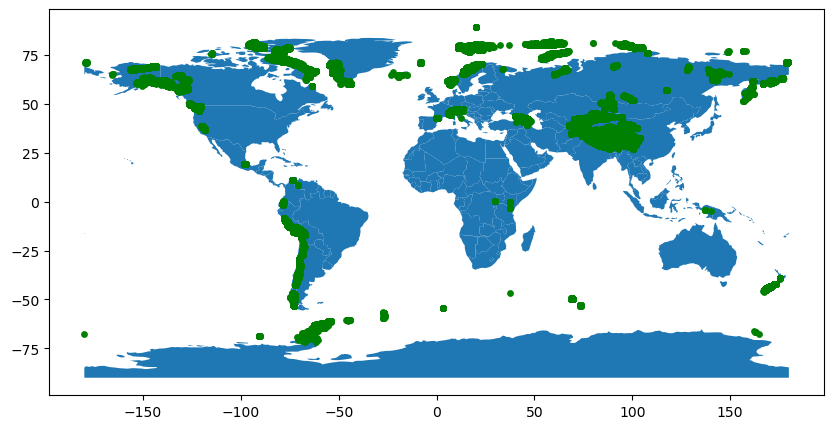

In [13]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='green', markersize=15)

In [14]:
df_pol_unit = df.groupby('Political Unit').count().reset_index()
df_pol_unit['percent_total'] = round(df_pol_unit['Glacier ID']/df_pol_unit['Glacier ID'].sum()*100)
df_pol_unit = df_pol_unit.sort_values('percent_total')

df_pol_unit.tail()

,Political Unit,Glacier ID,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year,geometry,percent_total
17,INDIA,4952,4952,4952,4952,4952,245,4952,4952,4952,...,1056,1224,1224,4888,4889,3919,4742,4129,4952,4.0
25,PAKISTAN,5223,5223,5223,5223,5223,138,5223,5223,5223,...,39,2948,2950,5223,3570,5223,5223,5223,5223,4.0
6,CANADA,16731,16731,16731,16731,16731,93,16731,16731,15311,...,9340,10271,13863,11960,14821,15266,2553,782,16731,13.0
35,USSR,23656,23656,23656,23656,23656,23066,23656,23656,23656,...,0,546,20807,23082,23082,2237,227,8249,23656,18.0
8,CHINA,45616,45616,45616,45616,45616,12693,45616,45616,45616,...,3724,45271,33074,45283,41090,33103,33103,32982,45616,34.0


#### Insights:
* 3 countries contain 65% of the world's glaciers with a total of over 86,000 glaciers
* The rest of the countries each have ~4% or less of the total glaciers in the world 

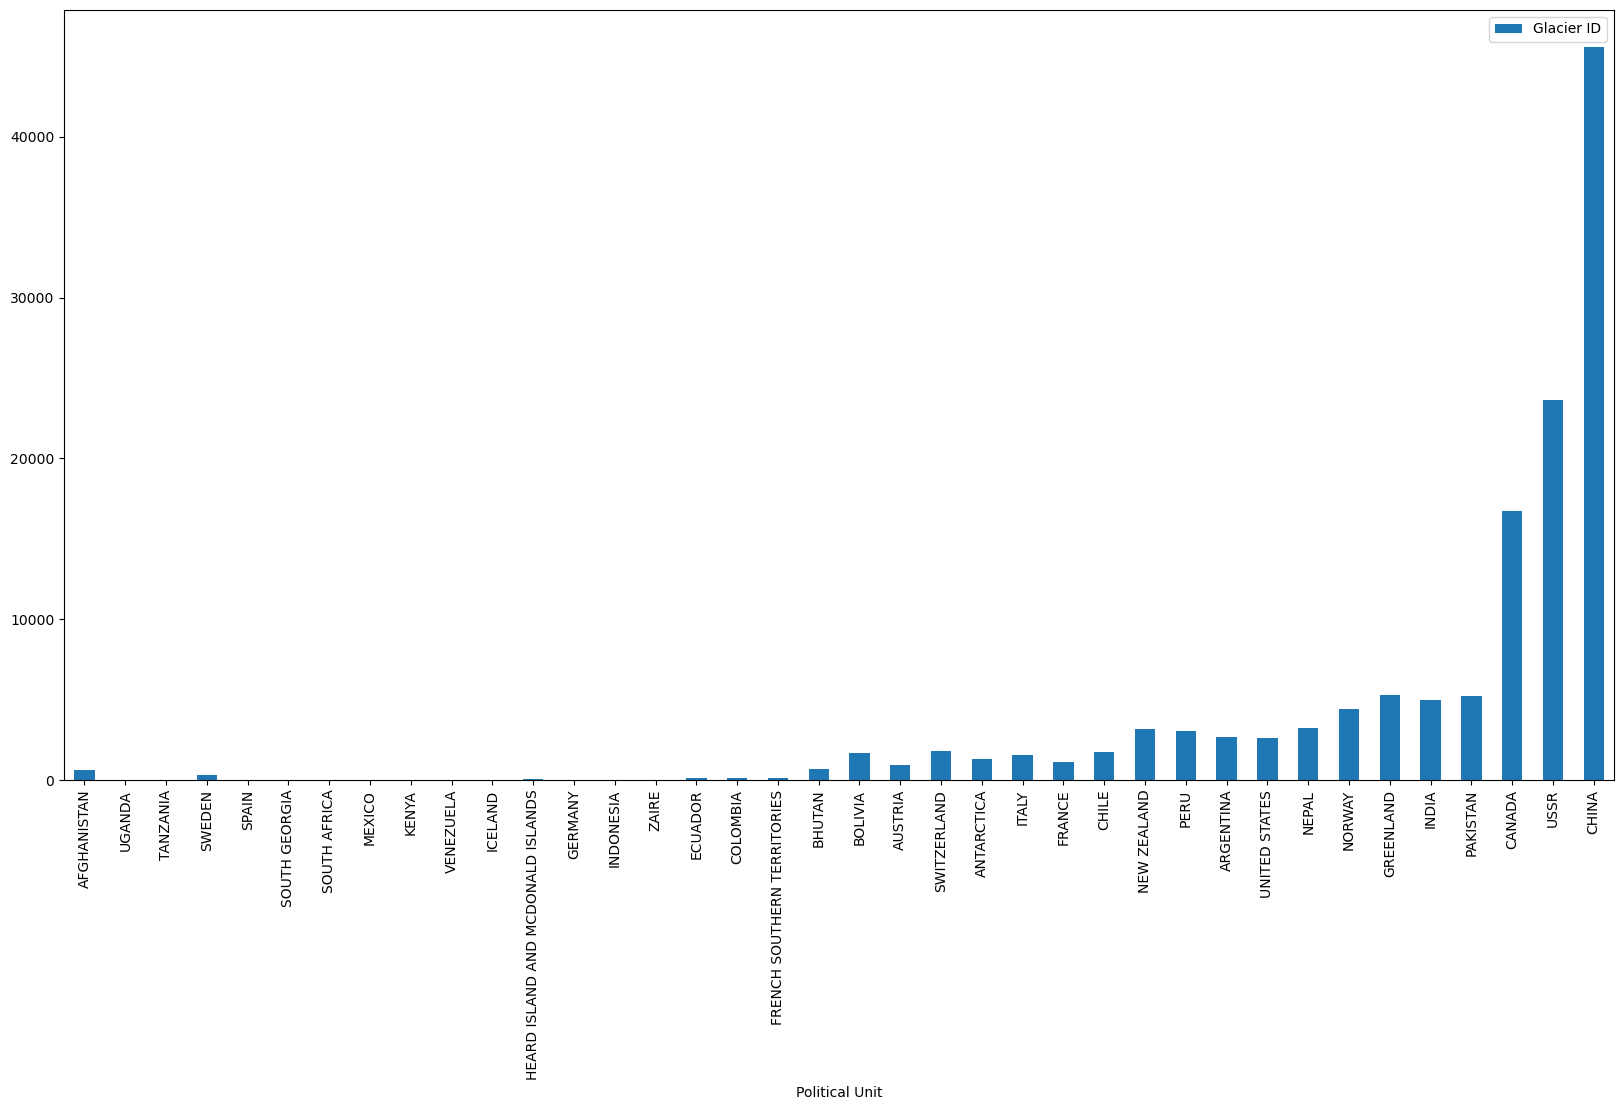

In [15]:
plot_count = df_pol_unit.plot.bar(x='Political Unit', y='Glacier ID', figsize=(20, 10), rot=90)

In [32]:
df = df.sort_values('Maximum Elevation',ascending=True)
df['Maximum Elevation'].head()

12716      0.0
3936       5.0
18768     10.0
108300    20.0
108301    20.0
Name: Maximum Elevation, dtype: float64

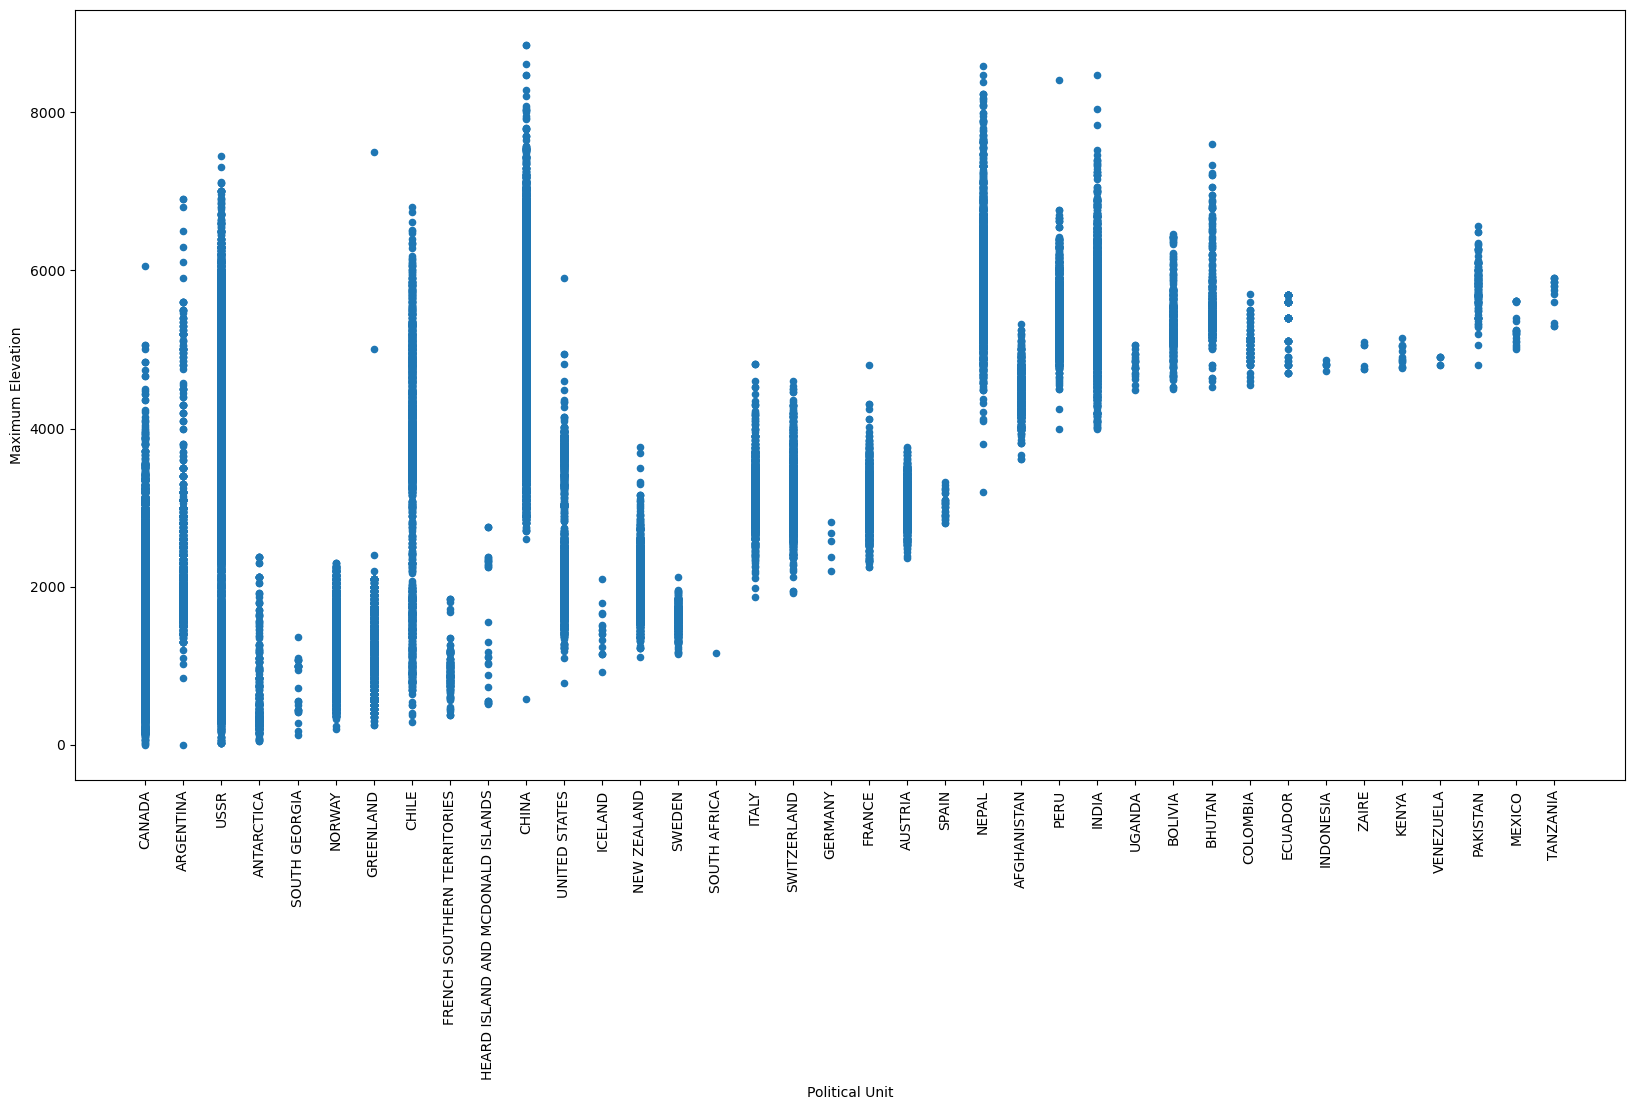

In [33]:
plot_elevation = df.plot.scatter(x='Political Unit', y='Maximum Elevation', figsize=(20, 10), rot=90)

### K-Means Clustering for Glaciers

In [1]:
from sklearn.cluster import KMeans

Create dataframe for kmeans clustering

In [ ]:
glacier_elbow = 

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(glacier_elbow)
    distortions.append(kmeanModel.inertia_)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.show()